### Data processing

# RAN WITH PYTHON 3.12

In [66]:
import torch


is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [67]:
# import pandas as pd
# import os


# if os.path.exists("big_merged_dataset.csv"):
#     # Read the CSV file
#     merged_df = pd.read_csv("big_merged_dataset.csv")
#     headline_data = pd.read_csv('analyst_ratings_processed.csv' , quotechar='"', quoting=2, delimiter=",")
#     print("CSV file exists. DataFrame loaded successfully.")
# else:
#     print("CSV file does not exist. Processing starts, this takes approximately 3 minutes")

#     headline_data = pd.read_csv('analyst_ratings_processed.csv' , quotechar='"', quoting=2, delimiter=",")



#     # Function to check if the value is a string
#     def is_string(value):
#         return isinstance(value, str)

#     # Filter the DataFrame to keep only rows where the 'date' column is a string
#     headline_data = headline_data[headline_data['date'].apply(is_string)]
#     print(len(headline_data))



#     headline_data["date"] = headline_data["date"].apply(lambda x: x.split(" ")[0])
#     print("Date processing done.")



#     # iterable list
#     rows = list(headline_data.iterrows())
#     print("Iterable list transformation done.")

#     merged_df = pd.DataFrame(columns=["title","diff_bool","stock"])
#     ticker = ""  # save the current stock ticker
#     start_block_idx = 0     # save the current stock-block start index to subset dataframe

#     # Iterate over the list with access to the next row
#     for i in range(len(rows) - 1):
#         current_index, current_row = rows[i]
#         ticker = current_row["stock"]

#         next_index, next_row = rows[i + 1]

#         if next_row["stock"] != ticker:
#             print("Processing stock: ", ticker, " | progress: " , (len(merged_df)/len(headline_data)))
#             # create subset, merge, insert in plain
#             temp_headline_dataset = headline_data.iloc[start_block_idx:current_index]
            
#             try:
#                 raw_stock_data = pd.read_csv(f'stocks/{ticker}.csv') # read the current stock prices
#             except:
#                 continue
#             raw_stock_data = raw_stock_data.rename(columns={'Date': 'date'})

#             # Calculate difference as boolean and numeric
#             raw_stock_data["diff_num"] = raw_stock_data["Close"] - raw_stock_data["Open"]
#             raw_stock_data["diff_bool"] = raw_stock_data["diff_num"].apply(lambda x: 1 if x > 0 else 0)

#             # Make a small DF and join with headline data
#             stock_data = raw_stock_data[["date","diff_bool"]]
#             temp_merged_df = pd.merge(temp_headline_dataset, stock_data, on='date', how='inner')
#             temp_merged_df = temp_merged_df[["title","diff_bool","stock"]]

#             merged_df = pd.concat([merged_df, temp_merged_df], axis=0, ignore_index=True) #merging to the overall dataset

#             # setting variables for further iteration of next stock-block
#             start_block_idx = next_index
#             ticker = next_row["stock"]

#     #export the csv so that the computation does not always have to be made
#     merged_df.to_csv("big_merged_dataset.csv",index=False)

# df = merged_df
# print("Length is: " , len(df), " rows")
# print("The dataset holds ", round((len(df)/len(headline_data))*100,2) , "% of the overall rows.")
# df.head()



In [68]:
import pandas as pd
df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding='latin-1')
df = df.iloc[:, [0, 5]]
df.columns.values[0] = "diff_bool"
df.columns.values[1] = "title"
df["diff_bool"] = df["diff_bool"].replace(4, 1)
df = df.loc[:,['title','diff_bool']]
df.head()

,title,diff_bool
0,is upset that he can't update his Facebook by ...,0
1,@Kenichan I dived many times for the ball. Man...,0
2,my whole body feels itchy and like its on fire,0
3,"@nationwideclass no, it's not behaving at all....",0
4,@Kwesidei not the whole crew,0


In [69]:
# for weak computation power, smaple n rows
df = df.sample(n=15000, random_state=1)
print(len(df))
df.head()

15000


,title,diff_bool
120640,i have to write a speech on &quot;speeches&quo...,0
189703,"Yeah, this is just great, sick in the middle o...",0
1595284,"anyway, gotta go.. CSI: NY up next and I have ...",1
1021096,@skimhannahkeys @AliciaSkimbit i like your app...,1
98291,@Lolene ummmmm.... U disappeared... So much fo...,0


In [70]:
# remove stopwords an punktuation

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download the stopwords and punkt tokenizer from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Function to clean text by removing stopwords and punctuation
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuation and convert to lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if not word in stop_words]
    # Join the tokens back into a string
    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

# Apply the function to the DataFrame
df['title'] = df['title'].apply(clean_text)

# View the result
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gabriel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/gabriel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,title,diff_bool
120640,write speech quot speeches quot wtf thanks raz,0
189703,yeah great sick middle night ca sleep gon na s...,0
1595284,anyway got ta go csi ny next asia memorize tyl...,1
1021096,skimhannahkeys aliciaskimbit like approach get...,1
98291,lolene ummmmm u disappeared much nite,0


In [71]:
# export as csv to be able to be fed into the tabular dataset
df.to_csv("train-processed.csv")

diff_bool
1    7563
0    7437
Name: count, dtype: int64


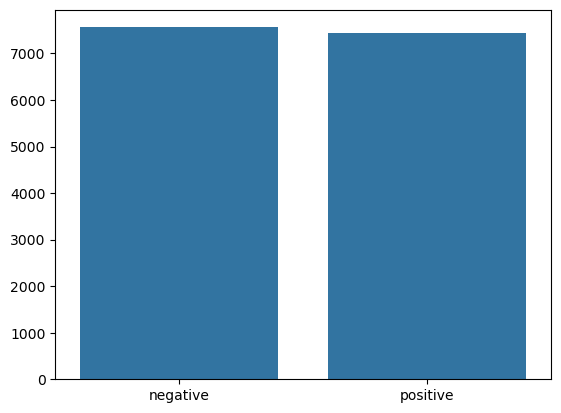

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print(df["diff_bool"].value_counts())
dd = pd.Series(df["diff_bool"]).value_counts()
sns.barplot(x=np.array(['negative','positive']),y=dd.values)
plt.show()

In [73]:
# import pandas as pd

# # Read headline_data
# headline_data = pd.read_csv('analyst_ratings_processed.csv' , quotechar='"', quoting=2, delimiter=",")

# # subset A stock for development-stage
# headline_data = headline_data[headline_data["stock"]=="A"]

# # Cut only date from datetime value
# headline_data["date"] = headline_data["date"].apply(lambda x: x.split(" ")[0])

# # Read Stock Data (only A for development-stage)
# raw_stock_data = pd.read_csv('A.csv')

# # Preprocessing
# raw_stock_data = raw_stock_data.rename(columns={'Date': 'date'})

# # Calculate difference as boolean and numeric
# raw_stock_data["diff_num"] = raw_stock_data["Open"] - raw_stock_data["Close"]
# raw_stock_data["diff_bool"] = raw_stock_data["diff_num"].apply(lambda x: 1 if x > 0 else 0)

# # Add label A for joining
# raw_stock_data["label"] = "A"

# # Make a small DF and join with headline data
# stock_data = raw_stock_data[["date","label", "diff_num","diff_bool"]]
# #print(stock_data[stock_data["diff_bool"]==1])
# merged_df = pd.merge(headline_data, stock_data, on='date', how='inner')

# # Drop unneccesary columns
# #merged_df = merged_df.drop(merged_df.columns[0], axis=1)
# # merged_df = merged_df.drop(columns=["label_x","label_y"])
# merged_df.head()

# #merged_df.to_csv('merged_df.csv', index=False)

In [74]:


# # Shape the training-dataset

# #dataset = pd.read_csv("Amerged_df.csv")

# dataset = merged_df[["title","diff_bool"]]
# dataset.rename(columns = {'diff_bool':'label'})
# print(dataset.head())
# dataset.to_csv("train-processed.csv")



### ML book OREILLY Part

In [75]:
%pip install torchtext==0.6.0
%pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [76]:
import spacy
import torch
from torchtext import data

# Define dataset

LABEL = data.LabelField(dtype=torch.long, batch_first=True, sequential=False)
TITLE = data.Field(tokenize="spacy", lower=True , tokenizer_language="en_core_web_sm")

fields = [("id",None), ("title", TITLE) , ("label", LABEL)]

stockDataset = data.TabularDataset(path="train-processed.csv",
                                   format="csv",
                                   fields=fields,
                                   skip_header=True)


(train,test,valid) = stockDataset.split(split_ratio=[0.8, 0.1, 0.1])


print( len(train), len(test) , len(valid) )
print( vars(train.examples[7])) # label = index????

12000 1500 1500
{'title': ['hoping', 'wonderful', 'day', 'even', 'raining', 'feel', 'like', 'calling', 'best', 'friend', 'tamara', 'love', 'twitter', 'addiction', 'x'], 'label': '1'}


In [77]:
# Build vocabulary

vocab_size = 10000
TITLE.build_vocab(train, max_size=vocab_size)
LABEL.build_vocab(train)

print("Length title vocabulary:", len(TITLE.vocab))
print("Most common words: ", TITLE.vocab.freqs.most_common(10))
# at this point no stopwords removal


Length title vocabulary: 10002
Most common words:  [('good', 675), ('like', 604), ('get', 603), ('go', 583), ('day', 582), ('http', 527), ('love', 516), ('got', 510), ('ca', 490), ('today', 480)]


In [78]:
# Define data iterator

device="cuda"

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(  (train, valid, test),
                                                                            batch_size = 32,
                                                                            device=device,
                                                                            sort_key = lambda x: len(x.title),
                                                                            sort_within_batch = False   ) # Überlegen: sort_key weg


In [79]:
# Define Model

import torch.nn as nn



class ModelLSTM(nn.Module):
    def __init__(self, vocab_size, hidden_size=100, embedding_dim=300, no_layers=1, dropout=0.25):
        super(ModelLSTM, self).__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.encoder = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=no_layers, dropout=dropout, bidirectional=True)
        self.predictor = nn.Linear(hidden_size*2, 2)


    def forward(self, seq):
        embedded = self.embedding(seq)
        output, (hidden, _) = self.encoder(embedded)
        preds = self.predictor(hidden[-2:].transpose(0, 1).contiguous().view(-1, hidden.size(2)*2))
        return preds

# Assuming you have defined vocab_size and device
hidden = 100
embed = 200 
number_layers = 2
dropout_rate = 0.5

model = ModelLSTM(vocab_size, hidden, embed, number_layers, dropout_rate)
model.to(device)



# class ModelLSTM(nn.Module):
#     def __init__(self, hidden_size, embedding_dim, vocab_size):
#         super(ModelLSTM, self).__init__()

#         self.embedding = nn.Embedding(vocab_size, embedding_dim)
#         self.encoder = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=1)
#         self.predictor = nn.Linear(hidden_size, 2)

#     def forward(self, seq):
#         output, (hidden,_) = self.encoder(self.embedding(seq))
#         preds = self.predictor(hidden.squeeze(0))
#         return preds
    

# model = ModelLSTM(100,300,vocab_size)
# model.to(device)

ModelLSTM(
  (embedding): Embedding(10000, 200)
  (encoder): LSTM(200, 100, num_layers=2, dropout=0.5, bidirectional=True)
  (predictor): Linear(in_features=200, out_features=2, bias=True)
)

In [80]:
# # Training loop
# import torch.nn.functional as F

# import torch.optim as optim

# optimizer = optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.CrossEntropyLoss()

# def train(epochs, model, optimizer, criterion, train_iterator, valid_iterator):
#     for epoch in range(1, epochs+1):
#         training_loss = 0.0
#         valid_loss = 0.0
#         model.train()

#         for batch_idx, batch in enumerate(train_iterator):
#             optimizer.zero_grad()
#             predict = model(batch.title)
#             loss = criterion(predict, batch.label)
#             loss.backward()
#             optimizer.step()
#             training_loss += loss.data.item() * batch.title.size(0)

#         training_loss /= len(train_iterator)
#         model.eval()

#         for batch_idx, batch in enumerate(valid_iterator):
#             predict = model(batch.title)
#             loss = criterion(predict, batch.label) 
#             valid_loss += loss.data.item() * batch.title.size(0)

#         valid_loss /= len(valid_iterator)

#         print('Epoch: {}, Training Loss: {:.2f}, '
#               'Validation Loss: {:.2f}'
#               .format(epoch, training_loss, valid_loss))


# train(10,model, optimizer,criterion, train_iterator, valid_iterator)

# torch.save(model.state_dict(), 'book_model.pt')


In [81]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# optimizer = optim.Adam(model.parameters(), lr=0.001)
# criterion = nn.CrossEntropyLoss()

# def calculate_accuracy(predict, labels):
#     _, preds = torch.max(predict, 1)
#     correct = torch.sum(preds == labels).item()
#     return correct / len(labels)

# def train(epochs, model, optimizer, criterion, train_iterator, valid_iterator):
#     for epoch in range(1, epochs+1):
#         training_loss = 0.0
#         valid_loss = 0.0
#         training_correct = 0
#         valid_correct = 0

#         model.train()
#         for batch_idx, batch in enumerate(train_iterator):
#             optimizer.zero_grad()
#             predict = model(batch.title)
#             loss = criterion(predict, batch.label)
#             loss.backward()
#             optimizer.step()
#             training_loss += loss.item() * batch.title.size(0)
#             training_correct += torch.sum(torch.argmax(predict, 1) == batch.label).item()

#         training_loss /= len(train_iterator.dataset)
#         training_accuracy = training_correct / len(train_iterator.dataset)

#         model.eval()
#         with torch.no_grad():
#             for batch_idx, batch in enumerate(valid_iterator):
#                 predict = model(batch.title)
#                 loss = criterion(predict, batch.label)
#                 valid_loss += loss.item() * batch.title.size(0)
#                 valid_correct += torch.sum(torch.argmax(predict, 1) == batch.label).item()

#         valid_loss /= len(valid_iterator.dataset)
#         valid_accuracy = valid_correct / len(valid_iterator.dataset)

#         print('Epoch: {}, Training Loss: {:.2f}, Training Accuracy: {:.2f}, '
#               'Validation Loss: {:.2f}, Validation Accuracy: {:.2f}'
#               .format(epoch, training_loss, training_accuracy, valid_loss, valid_accuracy))

#     torch.save(model.state_dict(), 'book_model.pt')

#     # Create confusion matrix
#     all_preds = []
#     all_labels = []
#     model.eval()
#     with torch.no_grad():
#         for batch_idx, batch in enumerate(valid_iterator):
#             predict = model(batch.title)
#             preds = torch.argmax(predict, 1)
#             all_preds.extend(preds.cpu().numpy())
#             all_labels.extend(batch.label.cpu().numpy())

#     cm = confusion_matrix(all_labels, all_preds)
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#     disp.plot()
#     plt.show()

# train(10, model, optimizer, criterion, train_iterator, valid_iterator)


Epoch: 1, Training Loss: 0.34, Training Accuracy: 0.57, Validation Loss: 0.16, Validation Accuracy: 0.65
Epoch: 2, Training Loss: 0.30, Training Accuracy: 0.67, Validation Loss: 0.15, Validation Accuracy: 0.69
Epoch: 3, Training Loss: 0.28, Training Accuracy: 0.72, Validation Loss: 0.15, Validation Accuracy: 0.70
Epoch: 4, Training Loss: 0.26, Training Accuracy: 0.75, Validation Loss: 0.15, Validation Accuracy: 0.69
Epoch: 5, Training Loss: 0.24, Training Accuracy: 0.77, Validation Loss: 0.14, Validation Accuracy: 0.71
Epoch: 6, Training Loss: 0.22, Training Accuracy: 0.80, Validation Loss: 0.15, Validation Accuracy: 0.69
Epoch: 7, Training Loss: 0.20, Training Accuracy: 0.83, Validation Loss: 0.16, Validation Accuracy: 0.68
Epoch: 8, Training Loss: 0.18, Training Accuracy: 0.85, Validation Loss: 0.16, Validation Accuracy: 0.71
Epoch: 9, Training Loss: 0.15, Training Accuracy: 0.87, Validation Loss: 0.17, Validation Accuracy: 0.69
Epoch: 10, Training Loss: 0.13, Training Accuracy: 0.90

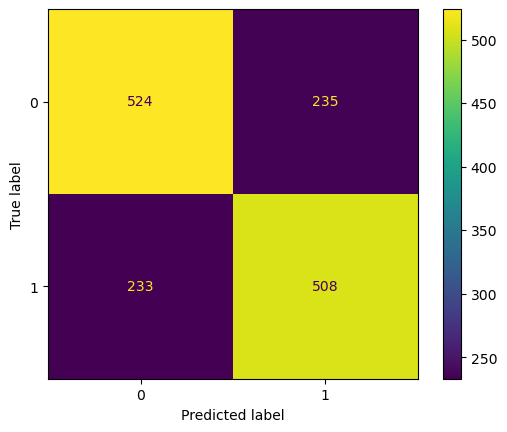

In [82]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-5)  # Added weight decay
criterion = nn.CrossEntropyLoss()
# criterion = nn.BCELoss()

def calculate_accuracy(predict, labels):
    _, preds = torch.max(predict, 1)
    correct = torch.sum(preds == labels).item()
    return correct / len(labels)

def train(epochs, model, optimizer, criterion, train_iterator, valid_iterator):
    best_valid_loss = float('inf')
    for epoch in range(1, epochs + 1):
        training_loss = 0.0
        valid_loss = 0.0
        training_correct = 0
        valid_correct = 0

        model.train()
        for batch_idx, batch in enumerate(train_iterator):
            optimizer.zero_grad()
            predict = model(batch.title)
            loss = criterion(predict, batch.label)
            loss.backward()
            optimizer.step()
            training_loss += loss.item() * batch.title.size(0)
            training_correct += torch.sum(torch.argmax(predict, 1) == batch.label).item()

        training_loss /= len(train_iterator.dataset)
        training_accuracy = training_correct / len(train_iterator.dataset)

        model.eval()
        with torch.no_grad():
            for batch_idx, batch in enumerate(valid_iterator):
                predict = model(batch.title)
                loss = criterion(predict, batch.label)
                valid_loss += loss.item() * batch.title.size(0)
                valid_correct += torch.sum(torch.argmax(predict, 1) == batch.label).item()

        valid_loss /= len(valid_iterator.dataset)
        valid_accuracy = valid_correct / len(valid_iterator.dataset)

        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), 'best_book_model.pt')  # Save best model

        print('Epoch: {}, Training Loss: {:.2f}, Training Accuracy: {:.2f}, '
              'Validation Loss: {:.2f}, Validation Accuracy: {:.2f}'
              .format(epoch, training_loss, training_accuracy, valid_loss, valid_accuracy))

    # Create confusion matrix
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for batch_idx, batch in enumerate(valid_iterator):
            predict = model(batch.title)
            preds = torch.argmax(predict, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch.label.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

train(10, model, optimizer, criterion, train_iterator, valid_iterator)


In [83]:
if model == None:
    model.load_state_dict(torch.load('book_model.pt'))
    print("Model was None -> loaded")


# Classify titles

def classify_headline(headline):
    categories = {0:"Stock Down", 1: "Stock Up"}
    processed = TITLE.process([TITLE.preprocess(headline)])
    processed = processed.to(device)
    model.eval()
    return categories[model(processed).argmax().item()]

In [84]:
classify_headline("KL Gold Reports Record Q1 Gold Sales of 21,014; New Paste Fill Hole 60% Completed")

'Stock Up'

### Qualtiy Metrics

In [85]:
# with classification_report function

from sklearn.metrics import classification_report

def evaluate_model(model, data_iterator):
    model.eval()
    y_true = []
    y_pred = []

    for batch_idx, batch in enumerate(data_iterator):
        predictions = model(batch.title)
        _, predicted_labels = predictions.max(dim=1)
        y_true.extend(batch.label.cpu().numpy())
        y_pred.extend(predicted_labels.cpu().numpy())

    report = classification_report(y_true, y_pred, target_names=["Stock Down", "Stock Up"])
    print(report)

# Call this method after training to evaluate on test/validation data
evaluate_model(model, test_iterator)
print("######")
evaluate_model(model, valid_iterator)




# calculate extra

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, data_iterator):
    model.eval()
    y_true = []
    y_pred = []

    for batch_idx, batch in enumerate(data_iterator):
        predictions = model(batch.title)
        _, predicted_labels = predictions.max(dim=1)
        y_true.extend(batch.label.cpu().numpy())
        y_pred.extend(predicted_labels.cpu().numpy())

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print("Accuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1-score: {:.4f}".format(f1))

# Call this method after training to evaluate on test/validation data
print("---------------------------------------")
evaluate_model(model, test_iterator)
print("######")
evaluate_model(model, valid_iterator)



              precision    recall  f1-score   support

  Stock Down       0.66      0.64      0.65       720
    Stock Up       0.68      0.70      0.69       780

    accuracy                           0.67      1500
   macro avg       0.67      0.67      0.67      1500
weighted avg       0.67      0.67      0.67      1500

######
              precision    recall  f1-score   support

  Stock Down       0.69      0.69      0.69       759
    Stock Up       0.68      0.69      0.68       741

    accuracy                           0.69      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.69      0.69      0.69      1500

---------------------------------------
Accuracy: 0.6720
Precision: 0.6714
Recall: 0.6709
F1-score: 0.6710
######
Accuracy: 0.6880
Precision: 0.6880
Recall: 0.6880
F1-score: 0.6880


In [86]:
import itertools
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def calculate_accuracy(predict, labels):
    _, preds = torch.max(predict, 1)
    correct = torch.sum(preds == labels).item()
    return correct / len(labels)

def train_and_evaluate(epochs, model, optimizer, criterion, train_iterator, valid_iterator):
    best_valid_loss = float('inf')
    best_valid_accuracy = 0.0
    for epoch in range(1, epochs + 1):
        training_loss = 0.0
        valid_loss = 0.0
        training_correct = 0
        valid_correct = 0

        model.train()
        for batch_idx, batch in enumerate(train_iterator):
            optimizer.zero_grad()
            predict = model(batch.title)
            loss = criterion(predict, batch.label)
            loss.backward()
            optimizer.step()
            training_loss += loss.item() * batch.title.size(0)
            training_correct += torch.sum(torch.argmax(predict, 1) == batch.label).item()

        training_loss /= len(train_iterator.dataset)
        training_accuracy = training_correct / len(train_iterator.dataset)

        model.eval()
        with torch.no_grad():
            for batch_idx, batch in enumerate(valid_iterator):
                predict = model(batch.title)
                loss = criterion(predict, batch.label)
                valid_loss += loss.item() * batch.title.size(0)
                valid_correct += torch.sum(torch.argmax(predict, 1) == batch.label).item()

        valid_loss /= len(valid_iterator.dataset)
        valid_accuracy = valid_correct / len(valid_iterator.dataset)

        if valid_accuracy > best_valid_accuracy:
            best_valid_accuracy = valid_accuracy
            best_model_state = model.state_dict()

        #print(f'Epoch: {epoch}, Training Loss: {training_loss:.2f}, Training Accuracy: {training_accuracy:.2f}, ' f'Validation Loss: {valid_loss:.2f}, Validation Accuracy: {valid_accuracy:.2f}')

    return best_valid_accuracy, best_model_state


device="cuda"

# Hyperparameters to tune
learning_rates = [0.00001, 0.001, 0.01]
weight_decay_list = [1e-5, 1e-3]

hidden_sizes = [50, 100, 150]
embedding_dims = [75, 125, 200]
number_layers=[2,5,10]
dropout_rates=[0.2, 0.5]

epochs_list = [5, 10]

# Placeholder for best model and its hyperparameters
best_hyperparams = None
best_accuracy = 0.0
best_model_state = None

total_combinations = len(learning_rates) * len(hidden_sizes) * len(embedding_dims) * len(epochs_list) * len(weight_decay_list) * len(number_layers) * len(dropout_rates)
completed_combinations = 0

# Iterate through all combinations of hyperparameters
for lr, hidden_size, embedding_dim, epochs, wd, no_layers, dropout in itertools.product(learning_rates, hidden_sizes, embedding_dims, epochs_list, weight_decay_list, number_layers, dropout_rates):
    # Initialize the model with the current set of hyperparameters
    model = ModelLSTM(vocab_size, hidden_size=hidden_size, embedding_dim=embedding_dim, no_layers=no_layers, dropout=dropout)  # Adjust model initialization as per your model definition
    model.to(device)

    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
    criterion = nn.CrossEntropyLoss()

    # Train and evaluate the model
    valid_accuracy, model_state = train_and_evaluate(epochs, model, optimizer, criterion, train_iterator, valid_iterator)

    completed_combinations += 1
    progress = (completed_combinations / total_combinations) * 100
    print(f'Progress: {progress:.2f}%')

    # Check if the current model is the best one
    if valid_accuracy > best_accuracy:
        best_accuracy = valid_accuracy
        best_hyperparams = (lr, hidden_size, embedding_dim, epochs, wd, no_layers, dropout)
        best_model_state = model_state
        torch.save(best_model_state, 'best_book_model.pt')
        print(f'New best model found with accuracy: {best_accuracy:.2f}')
        print(f'Hyperparameters - Learning Rate: {lr}, Hidden Size: {hidden_size}, Embedding Dim: {embedding_dim}, Epochs: {epochs}, Weight Decay: {wd}, Number Layers: {no_layers}, Dropout_rate: {dropout}'), 

# Final best model details
print('Best Validation Accuracy:', best_accuracy)
print('Best Hyperparameters:', best_hyperparams)


KeyboardInterrupt: 

In [ ]:
# import itertools
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchtext import data



# # Hyperparameters to tune
# learning_rates = [0.00001, 0.001, 0.01]
# hidden_sizes = [50, 100, 150]
# embedding_dims = [200, 300, 400]
# epochs = [5, 10]
# weight_decay=[1e-5, 1e-3]

# # Initialize best validation loss to infinity
# best_valid_loss = float('inf')

# # Grid Search
# for lr, hidden_size, embedding_dim, num_epochs in itertools.product(learning_rates, hidden_sizes, embedding_dims, epochs):
    
#     # Initialize the model with current set of hyperparameters
#     model = ModelLSTM(vocab_size, hidden, embed, number_layers, dropout_rate)
#     model.to(device)
    
#     # Define optimizer and loss function
#     optimizer = optim.Adam(model.parameters(), lr=lr)
#     criterion = nn.CrossEntropyLoss()
    
#     # Training and validation loop
#     for epoch in range(num_epochs):
#         model.train()
#         epoch_loss = 0
#         for batch in train_iterator:
#             optimizer.zero_grad()
#             predictions = model(batch.title)
#             loss = criterion(predictions, batch.label)
#             loss.backward()
#             optimizer.step()
#             epoch_loss += loss.item()
        
#         # Validation
#         model.eval()
#         valid_loss = 0
#         with torch.no_grad():
#             for batch in valid_iterator:
#                 predictions = model(batch.title)
#                 loss = criterion(predictions, batch.label)
#                 valid_loss += loss.item()
                
#         # Average validation loss for this epoch
#         valid_loss /= len(valid_iterator)
        
#         # Print progress
#         print(f'Epoch: {epoch+1}, LR: {lr}, Hidden: {hidden_size}, Embed: {embedding_dim}, Valid Loss: {valid_loss}')
        
#         # Update best model if validation loss improves
#         if valid_loss < best_valid_loss:
#             best_valid_loss = valid_loss
#             torch.save(model.state_dict(), 'best_model.pt')
#             print(f"Best model saved with LR: {lr}, Hidden: {hidden_size}, Embed: {embedding_dim}, Valid Loss: {valid_loss}")

# # Load and use the best model
# # best_model = ModelLSTM(vocab_size, best_hidden_size, best_embedding_dim)
# # best_model.load_state_dict(torch.load('best_model.pt'))
# # best_model.to(device)

# # Further code for evaluation and usage of best_model
